In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

## Importing model evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report 

##### Finding best validation using corss-validation
from sklearn.model_selection import GridSearchCV

### Importing the decision tree classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [3]:
Churn_data=pd.read_csv("telecom_churn.csv") 

In [4]:
Churn_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,High
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,Medium
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,Low
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,Low
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,High


In [5]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
 11  Income           3333 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 312.6+ KB


In [64]:
# Check for missing values in the dataset
Churn_data.isnull().sum().sum()

0

In [7]:
print(max(Churn_data['AccountWeeks']))
print(min(Churn_data['AccountWeeks']))

243
1


In [8]:
#Grouping Account weeks into groups of 50.. (0-50, 51-100...201-250)

bins = [0, 50, 100, 150, 200, 250]
labels = ['0-50 week','50-100 week','100-150 week','150-200 week','200-250 week']
Churn_data['AccountWeeks_Groups'] = pd.cut(Churn_data['AccountWeeks'], bins=bins, labels=labels)


In [9]:
Churn_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income,AccountWeeks_Groups
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,High,100-150 week
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,Medium,100-150 week
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,Low,100-150 week
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,Low,50-100 week
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,High,50-100 week


In [10]:
size_mapping = {'High': 3,'Medium': 2,'Low': 1}


In [11]:
#label-encoding or one-hot encoding?
#Churn_data['Income'] = Churn_data['Income'].map(size_mapping)
Churn_data = pd.get_dummies(Churn_data, columns=['Income'])

In [12]:
Churn_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeks_Groups,Income_High,Income_Low,Income_Medium
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,100-150 week,1,0,0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,100-150 week,0,0,1
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,100-150 week,0,1,0
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,50-100 week,0,1,0
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,50-100 week,1,0,0


Text(0.5, 1, 'Correlation Matrix')

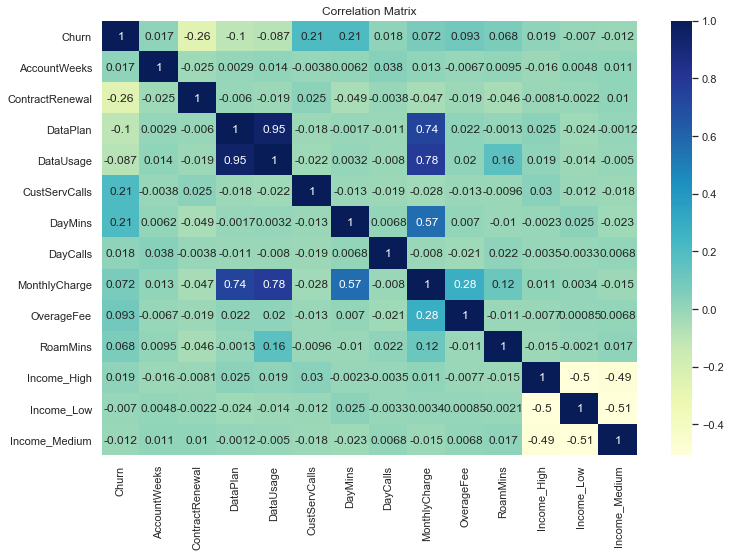

In [13]:
# checking for collinearity
# correlation matrix for numerical variables

corr_df=Churn_data.corr() 

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr_df,annot = True,cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')

In [14]:
# Monthly Charges and Dataplan,DataUsage are correlated. 
# So we will be removing Dataplan and DataUsage from the model.

Churn_data.drop(["DataPlan","DataUsage"],axis = 1, inplace = True) 


In [15]:
Churn_data.head()

,Churn,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeks_Groups,Income_High,Income_Low,Income_Medium
0,0,128,1,1,265.1,110,89.0,9.87,10.0,100-150 week,1,0,0
1,0,107,1,1,161.6,123,82.0,9.78,13.7,100-150 week,0,0,1
2,0,137,1,0,243.4,114,52.0,6.06,12.2,100-150 week,0,1,0
3,0,84,0,2,299.4,71,57.0,3.10,6.6,50-100 week,0,1,0
4,0,75,0,3,166.7,113,41.0,7.42,10.1,50-100 week,1,0,0


In [16]:
# plotting categorical variables against Churn
data_cat = ['AccountWeeks_Groups', 'ContractRenewal', 'CustServCalls','Income_High']

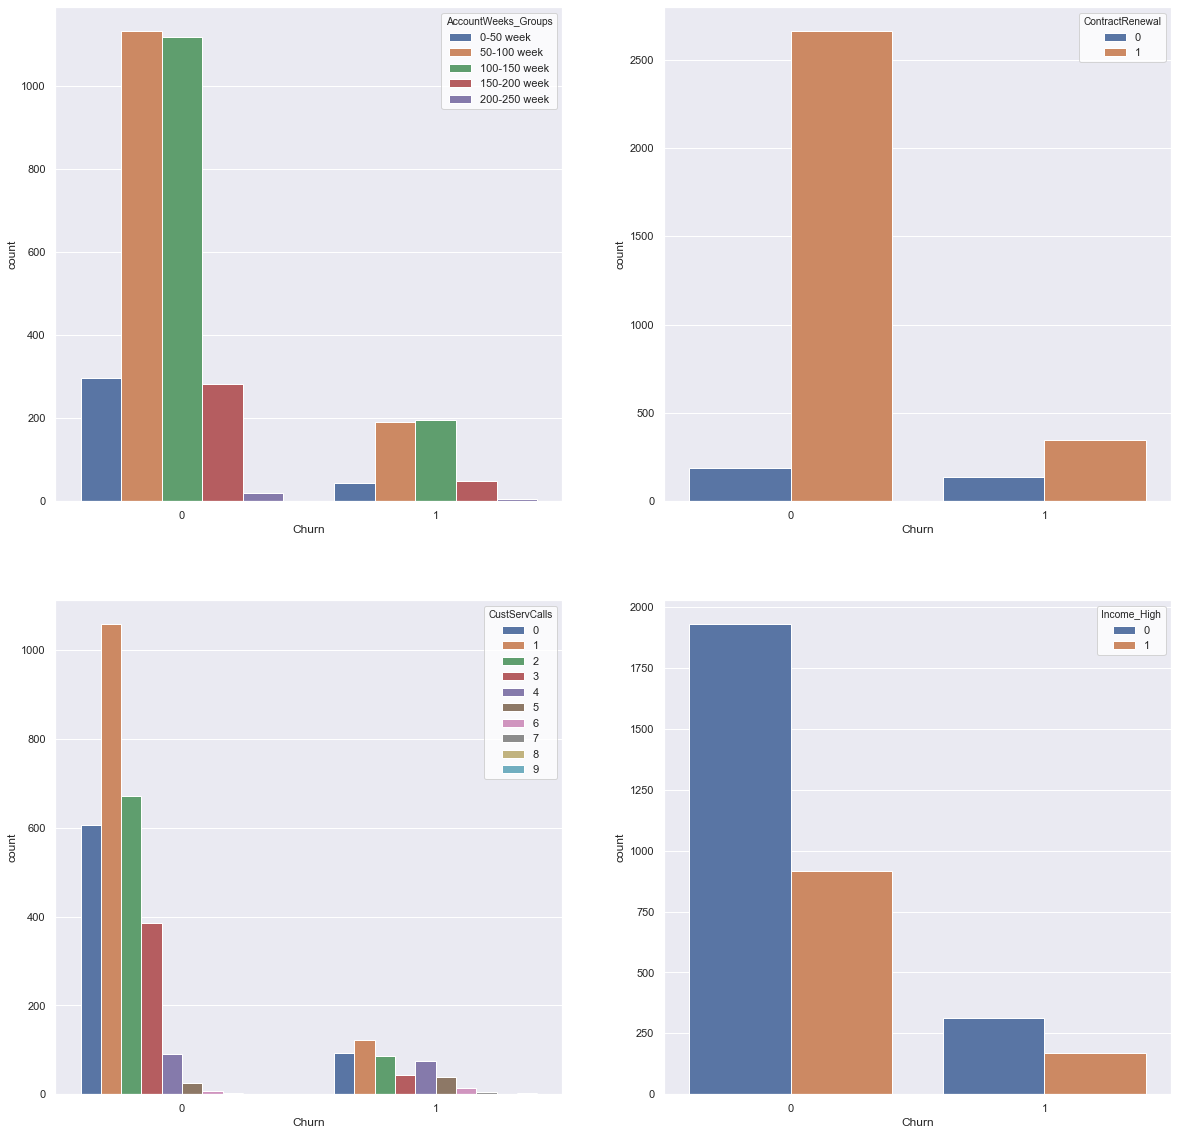

In [17]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=Churn_data["Churn"],hue=Churn_data[col],ax=axis)

In [18]:
Churn_data.head()

,Churn,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeks_Groups,Income_High,Income_Low,Income_Medium
0,0,128,1,1,265.1,110,89.0,9.87,10.0,100-150 week,1,0,0
1,0,107,1,1,161.6,123,82.0,9.78,13.7,100-150 week,0,0,1
2,0,137,1,0,243.4,114,52.0,6.06,12.2,100-150 week,0,1,0
3,0,84,0,2,299.4,71,57.0,3.10,6.6,50-100 week,0,1,0
4,0,75,0,3,166.7,113,41.0,7.42,10.1,50-100 week,1,0,0


In [19]:
Churn_data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'CustServCalls', 'DayMins',
       'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins',
       'AccountWeeks_Groups', 'Income_High', 'Income_Low', 'Income_Medium'],
      dtype='object')

In [20]:
#Seggregating Input and output. X is feature matrix , y in response /target vector

y=Churn_data['Churn']
X=Churn_data[['AccountWeeks', 'ContractRenewal', 'CustServCalls', 'DayMins',
       'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'Income_High', 'Income_Low', 'Income_Medium']]

In [21]:
print(X.shape)
print(y.shape)

(3333, 11)
(3333,)


In [22]:
# splitting the data into training and test sets (80:20)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(2666, 11)
(667, 11)


In [24]:
print(y_train.shape)
print(y_test.shape)

(2666,)
(667,)


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
## Train the Logistic Regression Model and Predcit for test data
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[2220   52]
 [ 325   69]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2272
           1       0.57      0.18      0.27       394

    accuracy                           0.86      2666
   macro avg       0.72      0.58      0.59      2666
weighted avg       0.83      0.86      0.83      2666

0.858589647411853


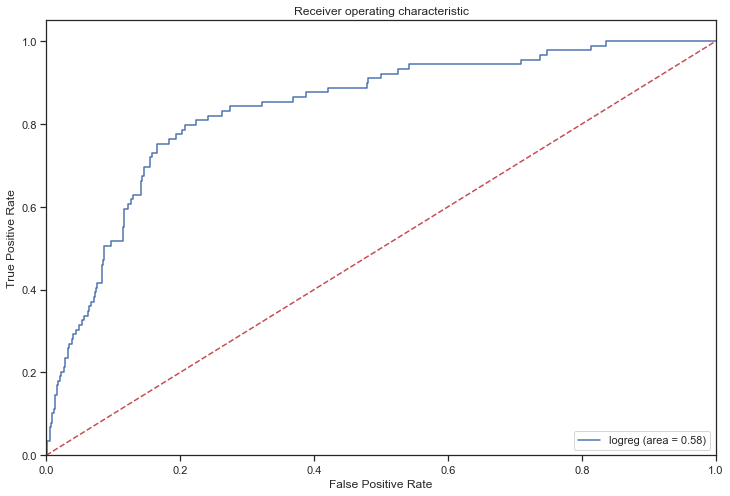

In [28]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logreg (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
y_pred=(logreg.predict_proba(X_test)[:,1]>0.30).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[528  50]
 [ 46  43]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       578
           1       0.46      0.48      0.47        89

    accuracy                           0.86       667
   macro avg       0.69      0.70      0.69       667
weighted avg       0.86      0.86      0.86       667

0.856071964017991


In [30]:
# keep probabilities for the positive outcome only
y_pred=logreg.predict_proba(X_test)
probs = y_pred[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.01)

In [31]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [32]:
# evaluate each threshold
from sklearn.metrics import f1_score,precision_score,recall_score
f1_scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
pre_scores = [precision_score(y_test, to_labels(probs, t)) for t in thresholds]
re_scores = [recall_score(y_test, to_labels(probs, t)) for t in thresholds]

/Users/sameer/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


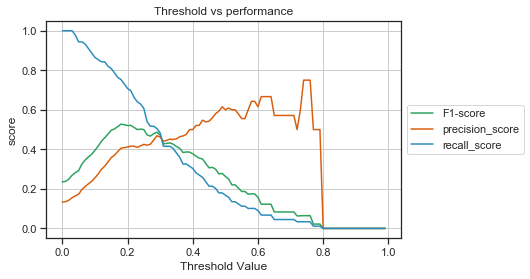

In [33]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2, 1)
plt.plot(thresholds, f1_scores, label="F1-score", color="#2ca25f")
plt.plot(thresholds, pre_scores, label="precision_score", color="#d95f0e")
plt.plot(thresholds, re_scores, label="recall_score", color="#2b8cbe")
plt.xlabel("Threshold Value")
plt.ylabel("score")
plt.title("Threshold vs performance")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.grid()

In [34]:
# get best threshold
ix = np.argmax(f1_scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], f1_scores[ix]))

Threshold=0.180, F-Score=0.52756


In [35]:
y_pred=(logreg.predict_proba(X_test)[:,1]>0.18).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[480  98]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       578
           1       0.41      0.75      0.53        89

    accuracy                           0.82       667
   macro avg       0.68      0.79      0.71       667
weighted avg       0.88      0.82      0.84       667

0.8200899550224887


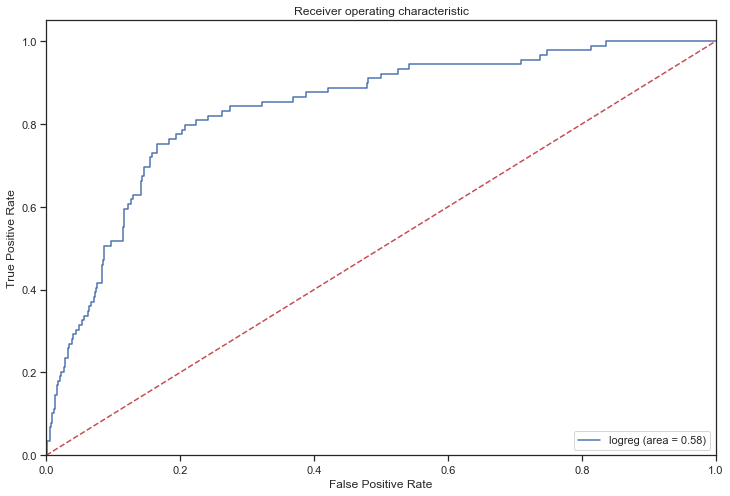

In [36]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logreg (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Model accuracy :  0.8845577211394303
[[546  32]
 [ 45  44]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       578
           1       0.58      0.49      0.53        89

    accuracy                           0.88       667
   macro avg       0.75      0.72      0.73       667
weighted avg       0.88      0.88      0.88       667

0.8845577211394303


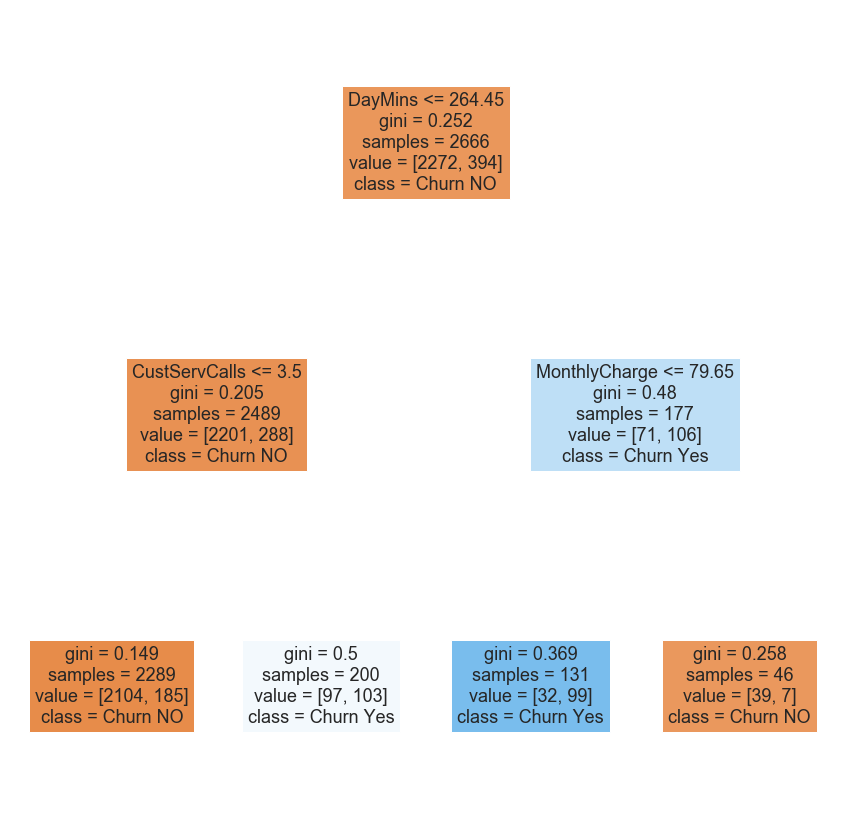

In [37]:
plt.figure(figsize=[15,15])
#max_depth=3
clf_dt = DecisionTreeClassifier(max_depth=2,criterion='gini')

clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=['Churn NO','Churn Yes'])
plt.show()

In [38]:
clf_dt.predict_proba(X_test)

array([[0.91917868, 0.08082132],
       [0.91917868, 0.08082132],
       [0.91917868, 0.08082132],
       ...,
       [0.91917868, 0.08082132],
       [0.485     , 0.515     ],
       [0.91917868, 0.08082132]])

In [39]:
### Finding the nest set of parameters using cross-validation
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'max_features':[0.5,0.6,0.7,0.8,0.9,1],
    'min_samples_leaf': [3,4,5],
    'min_samples_split' : [8,10,12],
    'criterion' :['gini','entropy']
}

In [40]:
# Instantiate the grid search model
clf_dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf_dt, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1, verbose = 2)

### Scoring options: 1. 'f1' 2. 'f1_macro' 3. 'f1_weighted' 3. 'roc_auc' 4. 'precision' 
##  5. 'recall' 6. 'accuracy' 7. 'neg_log_loss'

#Fit the grid search to the data
grid_search.fit(X_train, y_train)
### Find the best possible parameters
grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   23.7s finished


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.9,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [41]:
grid_search.best_score_

0.7150565118321385

In [42]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[567  11]
 [ 31  58]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       578
           1       0.84      0.65      0.73        89

    accuracy                           0.94       667
   macro avg       0.89      0.82      0.85       667
weighted avg       0.93      0.94      0.93       667

0.9370314842578711


In [43]:
# define model with class weights either using proportion of classes in dataset or experts guidance.
weights = {0:1, 1:1}
model = DecisionTreeClassifier(class_weight=weights,criterion='entropy',max_depth= 7,max_features=0.9,min_samples_leaf=3,min_samples_split=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[561  17]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       578
           1       0.78      0.67      0.72        89

    accuracy                           0.93       667
   macro avg       0.87      0.82      0.84       667
weighted avg       0.93      0.93      0.93       667

0.9310344827586207


In [44]:
importance = model.feature_importances_

In [45]:
### Map the feature importances to the coulnmn names and sort it in descending order of importance
feature_imp = pd.Series(model.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

DayMins            0.254170
CustServCalls      0.168363
MonthlyCharge      0.162192
ContractRenewal    0.152722
OverageFee         0.135363
RoamMins           0.070010
DayCalls           0.024971
AccountWeeks       0.024478
Income_High        0.007731
Income_Medium      0.000000
Income_Low         0.000000
dtype: float64

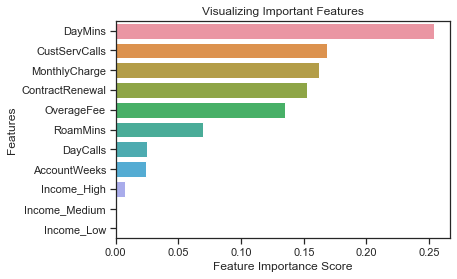

In [46]:
####### Plot the feature importance chart
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[569   9]
 [ 30  59]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       578
           1       0.87      0.66      0.75        89

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.94      0.94      0.94       667

0.9415292353823088


In [48]:
rf.predict_proba(X_test)

array([[0.94, 0.06],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [0.26, 0.74],
       [0.79, 0.21]])

In [48]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,7,9],
    'max_features': [0.4,0.6,0.8,1.0],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300],
    'max_samples': [0.6,0.7,0.9,1.0]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,scoring='f1', n_jobs = -1, verbose = 2)

#Fit the grid search to the data
grid_search.fit(X_train, y_train)
### Find the best possible parameters
grid_search.best_params_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1437 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2026 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2841 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3736 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 4857 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 18.1min finished


{'bootstrap': True,
 'max_depth': 9,
 'max_features': 0.6,
 'max_samples': 0.9,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [67]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[567  11]
 [ 31  58]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       578
           1       0.84      0.65      0.73        89

    accuracy                           0.94       667
   macro avg       0.89      0.82      0.85       667
weighted avg       0.93      0.94      0.93       667

0.9370314842578711


In [68]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=0.9,
                       min_samples_leaf=3, min_samples_split=10)

In [51]:
# define model with class weights either using proportion of classes in dataset or experts guidance.
weights = {0:1, 1:1}
model = RandomForestClassifier(class_weight=weights,bootstrap=True,max_depth= 5,max_features=1.0,min_samples_leaf=3,min_samples_split=8,n_estimators=200, max_samples=0.7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[570   8]
 [ 32  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       578
           1       0.88      0.64      0.74        89

    accuracy                           0.94       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.94      0.94      0.94       667

0.9400299850074962


In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [53]:
np.sum(y_train)/(len(y_train)-np.sum(y_train))

0.17341549295774647

In [54]:
over=SMOTE(sampling_strategy=0.30,random_state=42)
under = RandomUnderSampler(sampling_strategy=0.7,random_state=42)

In [55]:
X_res, y_res = over.fit_resample(X_train, y_train)
#X_res, y_res = under.fit_resample(X_res, y_res)

In [56]:
np.sum(y_res)/(len(y_res)-np.sum(y_res))

0.29973591549295775

In [57]:
# define model with class weights either using proportion of classes in dataset or experts guidance.
weights = {0:1, 1:1}
model = RandomForestClassifier(class_weight=weights,max_depth= 9,max_features=0.4,min_samples_leaf=3,min_samples_split=12,n_estimators=100,random_state=42)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[557  21]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       578
           1       0.76      0.74      0.75        89

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

0.9340329835082459


In [58]:
# Initialize Gaussian Naive Bayes
clf = GaussianNB()
seed=7

# Test options and evaluation metric
scoring = 'accuracy'

# Fitting the training set
clf.fit(X_train, y_train)

# Predicting for the Test Set
pred_clf = clf.predict(X_test)

# Prediction Probability
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Model Performance
# setting performance parameters
print(confusion_matrix(y_test,pred_clf))  
print(classification_report(y_test,pred_clf))  
print(accuracy_score(y_test, pred_clf))  

[[537  41]
 [ 57  32]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       578
           1       0.44      0.36      0.40        89

    accuracy                           0.85       667
   macro avg       0.67      0.64      0.66       667
weighted avg       0.84      0.85      0.85       667

0.8530734632683659


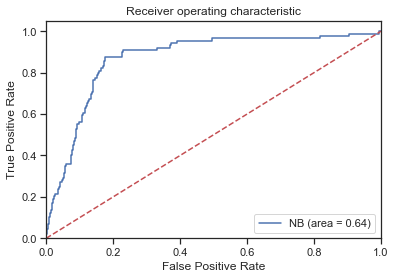

In [59]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[578   0]
 [ 89   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       578
           1       0.00      0.00      0.00        89

    accuracy                           0.87       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.75      0.87      0.80       667

0.8665667166416792


/Users/sameer/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [75]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=1.0)
svclassifier.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[564  14]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       578
           1       0.77      0.54      0.64        89

    accuracy                           0.92       667
   macro avg       0.85      0.76      0.79       667
weighted avg       0.91      0.92      0.91       667

0.9175412293853074


In [62]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


xgc.fit(X_res,y_res)

#telecom_churn_prediction(xgc,X_res,X_test,y_res,y_test,
 #                        cols,"features",threshold_plot = True)
y_pred = xgc.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[554  24]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       578
           1       0.73      0.72      0.72        89

    accuracy                           0.93       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.93      0.93      0.93       667

0.9265367316341829


In [63]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=42,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

lgbm_c.fit(X_res,y_res)

y_pred = xgc.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

/Users/sameer/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


[[554  24]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       578
           1       0.73      0.72      0.72        89

    accuracy                           0.93       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.93      0.93      0.93       667

0.9265367316341829


In [ ]:
model7 = model_report(gnb,X_res,X_test,y_res,y_test,
                      "Naive Bayes")
#model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
#                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,X_res,X_test,y_res,y_test,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,X_res,X_test,y_res,y_test,
                      "LGBM Classifier")
model11 = model_report(xgc,X_res,X_test,y_res,y_test,
                      "XGBoost Classifier")

